In [ ]:
# !pip install imblearn --user
# !pip install scikit-plot

In [6]:
import os
# !pip install catboost --user
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels
import catboost as cb
import sklearn
from catboost import CatBoostClassifier,Pool,CatBoostRegressor
from sklearn.metrics import classification_report,make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from itertools import product,chain
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix
import random
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# pip install imblearn --user
from imblearn.over_sampling import SMOTE
from catboost.utils import get_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

seed = 1
random.seed(seed)



print(os.getcwd())

/home/jupyter-caesarp/predictive


In [2]:
os.chdir("/home/jupyter-caesarp/predictive")
print(os.getcwd())

/home/jupyter-caesarp/predictive


In [3]:
data = pd.read_csv("train_bnry.csv")
data.tail(20)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1440,79.0,11526,0.0,0,0,588,588,1423,748,384,...,0,0,0,0,1,0,0,0,1,0
1441,0.0,4426,147.0,697,0,151,848,848,0,0,...,0,0,0,0,1,0,0,0,1,0
1442,85.0,11003,160.0,765,0,252,1017,1026,981,0,...,0,0,0,0,1,0,0,0,1,0
1443,0.0,8854,0.0,0,0,952,952,952,0,0,...,0,0,0,0,1,0,0,0,1,0
1444,63.0,8500,106.0,0,0,1422,1422,1422,0,0,...,0,0,0,0,1,0,0,0,1,0
1445,70.0,8400,0.0,187,627,0,814,913,0,0,...,0,0,0,0,1,0,0,0,1,0
1446,0.0,26142,189.0,593,0,595,1188,1188,0,0,...,0,0,0,0,1,0,0,0,1,0
1447,80.0,10000,438.0,1079,0,141,1220,1220,870,0,...,0,0,0,0,1,0,0,0,1,0
1448,70.0,11767,0.0,0,0,560,560,796,550,0,...,0,0,0,0,1,0,0,0,1,0
1449,21.0,1533,0.0,553,0,77,630,630,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
pd.set_option('display.max_columns', None)
data.head(20)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_19

In [5]:
normalize_features = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
"LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch",'PoolArea',"MiscVal"]
len(normalize_features)

# checklist = list(X.columns)

##check that element is copied down correctly
# for ele in normalize_features:
#     if ele not in checklist:
#         print("{} Not in checklist".format(ele))
#     else:
#         print("ele")

19

In [8]:
y,X =data.loc[:,"SalePrice"],data.drop(columns=['SalePrice'])

In [9]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[normalize_features] = scaler.fit_transform(X[normalize_features])
X

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,Garag

In [10]:
X.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,Garag

In [11]:
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=seed)

In [12]:
X_training.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,Garag

In [13]:
#numpy so its faster when training model
X_training = X_training.to_numpy()
y_training = y_training.to_numpy()

X_testing = X_testing.to_numpy()
y_testing = y_testing.to_numpy()

In [14]:
#create a training and cross validation set
X_train, X_cv, y_train, y_cv = train_test_split(X_training, y_training, test_size=0.2, random_state=seed)

In [15]:
def gscv_results(model,x,y):
    params = model.get_params
    best_estimator = model.best_estimator_
    best_idx = model.best_index_
    cv_results = model.cv_results_
    best_score = model.best_score_
    best_params = model.best_params_
    
    print(plot_confusion_matrix(model,x,y))

In [16]:
# plot gridsearch results for two parameters
def plot_results(index, columns):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    gscv_gscv_df = pd.DataFrame(gscv.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in gscv_gscv_df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
        gscv_gscv_df = gscv_gscv_df[gscv_gscv_df[col] == gscv.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = gscv_gscv_df.pivot_table(index=index, columns=columns,
                                values=['mean_test_RMSE'])
    table_std = gscv_gscv_df.pivot_table(index=index, columns=columns,
                               values=['std_test_RMSE'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label="Mean RMSE")
    plt.title('Grid-search results (higher is better)')
    plt.ylabel('RMSE Score')
    plt.legend(title=table_mean.columns.names)
    plt.show()

In [71]:
%%time
model_cb = cb.CatBoostRegressor(random_seed=seed,verbose=100)

param = {
    'learning_rate':[0.03, 0.06, 0.1],
#     "min_data_in_leaf":[10,30,70],
#     'scale_pos_weight': [0.15,0.033,0.6,0.9],
    "iterations":[100,600,1800,3600],
#     'depth' : [ 6, 10, 16, 20],
#     'loss_function': ['AUC'],
#     "score_function":["L2"],
#     'leaf_estimation_iterations': [1,3]
}

# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
scoring_param = {'R2': 'r2', "RMSE":"neg_root_mean_squared_error"}


# gscv = GridSearchCV(model_1,param,scoring=scoring,cv=3,refit='AUC',verbose=100) #randomized search
# gscv = RandomizedSearchCV(model_cb, param_distributions=param
#                           ,scoring=scoring_param,cv=10,refit='RMSE',verbose=100,random_state=seed,n_iter=10) #randomized search

gscv = GridSearchCV(model_cb, param_grid=param
                          ,scoring=scoring_param,cv=10,refit='RMSE',verbose=500) #randomized search

# # fitmodel for gridsearch
gscv_1 = gscv.fit(X_train,y_train,eval_set=(X_cv, y_cv),early_stopping_rounds=100)
gscv_1_df = pd.DataFrame(gscv.cv_results_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START iterations=100, learning_rate=0.03........................
0:	learn: 79214.3817927	test: 73145.9885840	best: 73145.9885840 (0)	total: 49.1ms	remaining: 4.86s
99:	learn: 30137.8692155	test: 30795.2066911	best: 30795.2066911 (99)	total: 615ms	remaining: 0us

bestTest = 30795.20669
bestIteration = 99

[CV 1/10; 1/12] END iterations=100, learning_rate=0.03; R2: (test=0.848) RMSE: (test=-24126.959) total time=   0.8s
[CV 2/10; 1/12] START iterations=100, learning_rate=0.03........................
0:	learn: 78705.1152463	test: 72923.5409032	best: 72923.5409032 (0)	total: 31.2ms	remaining: 3.09s
99:	learn: 29709.0733985	test: 30080.4691262	best: 30080.4691262 (99)	total: 481ms	remaining: 0us

bestTest = 30080.46913
bestIteration = 99

[CV 2/10; 1/12] END iterations=100, learning_rate=0.03; R2: (test=0.859) RMSE: (test=-24253.195) total time=   0.7s
[CV 3/10; 1/12] START iterations=100, learning_rate=0.03.....

In [76]:
gscv_1_df.sort_values(by="rank_test_RMSE", ascending = True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_iterations,param_learning_rate,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
6,6.683788,0.612969,0.017336,0.004470,1800,0.03,"{'iterations': 1800, 'learning_rate': 0.03}",0.905268,0.904711,0.884636,0.910966,0.795991,0.830601,0.868355,0.765001,0.925543,0.710964,0.850204,0.068452,1,-19036.252141,-19941.510969,-24129.277925,-27952.319198,-40636.236780,-34139.701039,-27649.566069,-43324.575466,-19293.293684,-40786.747311,-29688.948058,8963.206994,1
9,8.166513,1.731314,0.021264,0.006532,3600,0.03,"{'iterations': 3600, 'learning_rate': 0.03}",0.905280,0.904417,0.884636,0.910966,0.795409,0.830512,0.868355,0.764660,0.925462,0.710964,0.850066,0.068512,2,-19035.061034,-19972.320603,-24129.277925,-27952.319198,-40694.130865,-34148.634943,-27649.566069,-43356.001231,-19303.876226,-40786.747311,-29702.793540,8971.082404,2
3,2.536630,0.207641,0.022725,0.005751,600,0.03,"{'iterations': 600, 'learning_rate': 0.03}",0.901603,0.902232,0.878376,0.906531,0.793880,0.823990,0.866617,0.762190,0.924835,0.708396,0.846865,0.068380,3,-19400.941595,-20199.256492,-24775.283414,-28640.028128,-40845.911771,-34799.526863,-27831.554943,-43582.947999,-19384.854038,-40967.584780,-30042.789002,8946.287613,3
10,5.230775,2.037534,0.020919,0.005961,3600,0.06,"{'iterations': 3600, 'learning_rate': 0.06}",0.897260,0.898797,0.880712,0.904554,0.790711,0.838538,0.865815,0.756203,0.917348,0.695683,0.844562,0.070202,4,-19824.474624,-20551.047844,-24536.289629,-28941.357539,-41158.707172,-33330.357921,-27915.012316,-44128.180640,-20327.415087,-41851.098079,-30256.394085,8925.847888,4
7,4.827733,1.019514,0.019950,0.006019,1800,0.06,"{'iterations': 1800, 'learning_rate': 0.06}",0.897073,0.898797,0.880712,0.904554,0.790711,0.838538,0.865815,0.756203,0.917348,0.695683,0.844543,0.070187,5,-19842.568650,-20551.047844,-24536.289629,-28941.357539,-41158.707172,-33330.357921,-27915.012316,-44128.180640,-20327.415087,-41851.098079,-30258.203488,8923.734583,5
4,2.537210,0.299018,0.019223,0.007628,600,0.06,"{'iterations': 600, 'learning_rate': 0.06}",0.894695,0.899494,0.878397,0.903765,0.790241,0.839303,0.864367,0.757698,0.917181,0.698061,0.844320,0.069161,6,-20070.459208,-20480.173951,-24773.221261,-29060.706306,-41204.909192,-33251.274614,-28065.224293,-43992.625221,-20347.912456,-41687.242618,-30293.374912,8842.939538,6
8,2.373761,0.407543,0.022008,0.005010,1800,0.1,"{'iterations': 1800, 'learning_rate': 0.1}",0.892544,0.899167,0.877078,0.896521,0.814032,0.844612,0.867840,0.776978,0.907957,0.649858,0.842659,0.075482,7,-20274.347029,-20513.447030,-24907.174082,-30134.623139,-38797.823345,-32697.413469,-27703.574439,-42206.091975,-21451.110567,-44891.647635,-30357.725271,8619.994228,7
11,2.431284,0.455780,0.021193,0.009299,3600,0.1,"{'iterations': 3600, 'learning_rate': 0.1}",0.892544,0.899167,0.877078,0.896521,0.814032,0.844612,0.867840,0.776978,0.907957,0.649858,0.842659,0.075482,7,-20274.347029,-20513.447030,-24907.174082,-30134.623139,-38797.823345,-32697.413469,-27703.574439,-42206.091975,-21451.110567,-44891.647635,-30357.725271,8619.994228,7
5,2.321271,0.334311,0.020363,0.005814,600,0.1,"{'iterations': 600, 'learning_rate': 0.1}",0.892544,0.899062,0.877078,0.896521,0.814032,0.844612,0.867840,0.776978,0.907656,0.649858,0.842618,0.075448,9,-20274.347029,-20524.109157,-24907.174082,-30134.623139,-38797.823345,-32697.413469,-27703.574439,-42206.091975,-21486.222572,-44891.647635,-30362.302684,8615.153869,9
2,0.598513,0.063417,0.020415,0.007205,100,0.1,"{'iterations': 100, 'learning_rate': 0.1}",0.882621,0.905979,0.859159,0.884293,0.804604,0.821658,0.867192,0.77

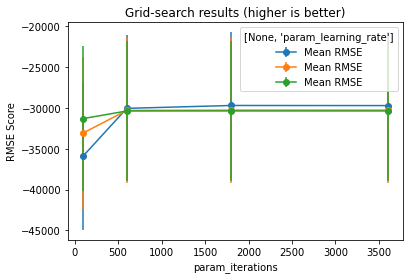

In [75]:
plot_results(index='iterations', columns='learning_rate')

In [118]:
evalset = (X_cv,y_cv)

In [79]:
np.arange(1800,4800,400)

array([1800, 2200, 2600, 3000, 3400, 3800, 4200, 4600])

In [80]:
%%time
model_cb = cb.CatBoostRegressor(random_seed=seed,verbose=500
#                                ,learning_rate=,iterations
                               )

param = {
    'learning_rate':[0.01,0.03],
    "iterations":np.arange(1800,4800,400),
#     "min_data_in_leaf":[10,30,70],
#     'scale_pos_weight': [0.15,0.033,0.6,0.9],
#     'depth' : [ 6, 10, 16, 20],
#     'loss_function': ['AUC'],
#     "score_function":["L2"],
#     'leaf_estimation_iterations': [1,3]
}

# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
scoring_param = {'R2': 'r2', "RMSE":"neg_root_mean_squared_error"}


# gscv = GridSearchCV(model_1,param,scoring=scoring,cv=3,refit='AUC',verbose=100) #randomized search
# gscv = RandomizedSearchCV(model_cb, param_distributions=param
#                           ,scoring=scoring_param,cv=10,refit='RMSE',verbose=100,random_state=seed,n_iter=10) #randomized search

gscv = GridSearchCV(model_cb, param_grid=param
                          ,scoring=scoring_param,cv=5,refit='RMSE',verbose=500) #randomized search
# # fitmodel for gridsearch
gscv_2 = gscv.fit(X_train,y_train,eval_set=(X_cv, y_cv),early_stopping_rounds=100)
gscv_2_df = pd.DataFrame(gscv.cv_results_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START iterations=1800, learning_rate=0.01........................
0:	learn: 81377.3566304	test: 74088.3208347	best: 74088.3208347 (0)	total: 22.6ms	remaining: 40.6s
500:	learn: 24245.9251556	test: 27654.1604035	best: 27654.1604035 (500)	total: 1.84s	remaining: 4.77s
1000:	learn: 17008.9150554	test: 25260.5607451	best: 25260.5607451 (1000)	total: 3.54s	remaining: 2.83s
1500:	learn: 12929.2178581	test: 24390.8146721	best: 24390.8146721 (1500)	total: 5.47s	remaining: 1.09s
1799:	learn: 11349.2108636	test: 24151.1169760	best: 24151.1169760 (1799)	total: 6.43s	remaining: 0us

bestTest = 24151.11698
bestIteration = 1799

[CV 1/5; 1/16] END iterations=1800, learning_rate=0.01; R2: (test=0.897) RMSE: (test=-20337.654) total time=   6.8s
[CV 2/5; 1/16] START iterations=1800, learning_rate=0.01........................
0:	learn: 77838.1492149	test: 73863.5030349	best: 73863.5030349 (0)	total: 2.58ms	remaining: 4.63s
500:	

In [83]:
gscv_2_relevant = gscv_2_df[["rank_test_RMSE",'param_iterations', 'param_learning_rate',"params","mean_test_R2","mean_test_RMSE","std_test_R2","std_test_RMSE",]]
gscv_2_relevant.sort_values(by="rank_test_RMSE", ascending = True)

,rank_test_RMSE,param_iterations,param_learning_rate,params,mean_test_R2,mean_test_RMSE,std_test_R2,std_test_RMSE
7,1,3000,0.03,"{'iterations': 3000, 'learning_rate': 0.03}",0.844861,-30734.365762,0.037463,6262.541624
9,1,3400,0.03,"{'iterations': 3400, 'learning_rate': 0.03}",0.844861,-30734.365762,0.037463,6262.541624
11,1,3800,0.03,"{'iterations': 3800, 'learning_rate': 0.03}",0.844861,-30734.365762,0.037463,6262.541624
13,1,4200,0.03,"{'iterations': 4200, 'learning_rate': 0.03}",0.844861,-30734.365762,0.037463,6262.541624
15,1,4600,0.03,"{'iterations': 4600, 'learning_rate': 0.03}",0.844861,-30734.365762,0.037463,6262.541624
5,6,2600,0.03,"{'iterations': 2600, 'learning_rate': 0.03}",0.844861,-30734.383360,0.037463,6262.553179
3,7,2200,0.03,"{'iterations': 2200, 'learning_rate': 0.03}",0.844787,-30741.677098,0.037506,6267.357229
1,8,1800,0.03,"{'iterations': 1800, 'learning_rate': 0.03}",0.844751,-30745.166751,0.037652,6284.129497
14,9,4600,0.01,"{'iterations': 4600, 'learning_rate': 0.01}",0.843553,-30807.311887,0.041499,6444.116291
12,10,4200,0.01,"{'iterations': 4200, 'learning_rate': 0.01}",0.843506,-30811.843330,0.041524,6447.143771


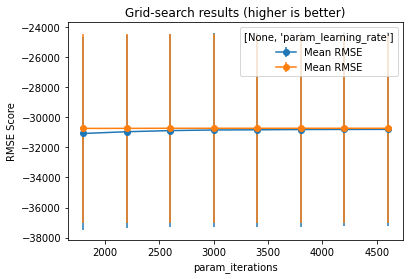

In [84]:
plot_results(index='iterations', columns='learning_rate')

In [86]:
%%time
model_cb = cb.CatBoostRegressor(random_seed=seed,verbose=400
                               ,learning_rate=0.03,iterations=3000
                               ,)

param = {
#     'learning_rate':[0.01,0.03],
#     "iterations":np.arange(1800,3800,400),
#     "grow_policy": ["Lossguide"],
    "min_data_in_leaf":[3,6,15],
# #     "bootstrap_type" : ["Bayesian"],
# #     "subsample":[0.66],
# #     'bagging_temperature':[0.02,0.05],
# #     'random_strength':[0.1,0.2,0.5,],
# #     "score_function":["Cosine","L2"],
    'l2_leaf_reg': [3,10,30],
# #     "sampling_unit": ["Object","Group"],
# #     "score_function":["Cosine","L2"],
#     'leaf_estimation_iterations': [1,5]
#     "custom_loss":["AUC"],
# #     "od_wait": [4,8,10],
}

# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
scoring_param = {'R2': 'r2', "RMSE":"neg_root_mean_squared_error"}

# gscv = GridSearchCV(model_1,param,scoring=scoring,cv=3,refit='AUC',verbose=100) #randomized search
# gscv = RandomizedSearchCV(model_cb, param_distributions=param
#                           ,scoring=scoring_param,cv=10,refit='RMSE',verbose=100,random_state=seed,n_iter=10) #randomized search

gscv = GridSearchCV(model_cb, param_grid=param
                          ,scoring=scoring_param,cv=5,refit='RMSE',verbose=400) #randomized search
# # fitmodel for gridsearch
gscv_3 = gscv.fit(X_train,y_train,eval_set=(X_cv, y_cv),early_stopping_rounds=100)
gscv_3_df = pd.DataFrame(gscv.cv_results_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START l2_leaf_reg=3, min_data_in_leaf=3...........................
0:	learn: 80365.6432247	test: 73271.2880578	best: 73271.2880578 (0)	total: 3.11ms	remaining: 9.33s
400:	learn: 15379.0151784	test: 24839.7226990	best: 24839.7226990 (400)	total: 1.44s	remaining: 9.36s
800:	learn: 9408.9517903	test: 24000.2012390	best: 23998.7632806 (799)	total: 2.82s	remaining: 7.75s
1200:	learn: 6585.9356141	test: 23675.1745355	best: 23675.1745355 (1200)	total: 4.04s	remaining: 6.05s
1600:	learn: 4670.9387095	test: 23477.7045668	best: 23476.9509011 (1598)	total: 5.22s	remaining: 4.56s
2000:	learn: 3457.1142457	test: 23393.8115110	best: 23393.6479963 (1998)	total: 6.42s	remaining: 3.21s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 23351.4062
bestIteration = 2138

Shrink model to first 2139 iterations.
[CV 1/5; 1/9] END l2_leaf_reg=3, min_data_in_leaf=3; R2: (test=0.897) RMSE: (test=-20333.308) total time=   7

In [90]:
gscv_3_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l2_leaf_reg,param_min_data_in_leaf,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,6.439924,1.939833,0.022650,0.001222,3,3,"{'l2_leaf_reg': 3, 'min_data_in_leaf': 3}",0.897234,0.882741,0.813491,0.823232,0.807609,0.844861,0.037463,4,-20333.308423,-27803.732743,-38499.984170,-34846.146739,-32188.656734,-30734.365762,6262.541624,4
1,6.660509,2.132985,0.022012,0.001150,3,6,"{'l2_leaf_reg': 3, 'min_data_in_leaf': 6}",0.897234,0.882741,0.813491,0.823232,0.807609,0.844861,0.037463,4,-20333.308423,-27803.732743,-38499.984170,-34846.146739,-32188.656734,-30734.365762,6262.541624,4
2,6.674094,2.101152,0.024419,0.004473,3,15,"{'l2_leaf_reg': 3, 'min_data_in_leaf': 15}",0.897234,0.882741,0.813491,0.823232,0.807609,0.844861,0.037463,4,-20333.308423,-27803.732743,-38499.984170,-34846.146739,-32188.656734,-30734.365762,6262.541624,4
3,8.962430,2.158187,0.030080,0.012183,10,3,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 3}",0.887699,0.889006,0.821396,0.826050,0.811031,0.847036,0.034085,1,-21255.717944,-27050.731390,-37675.279340,-34567.335762,-31901.033715,-30490.019630,5785.230435,1
4,9.324354,2.044023,0.026395,0.003671,10,6,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 6}",0.887699,0.889006,0.821396,0.826050,0.811031,0.847036,0.034085,1,-21255.717944,-27050.731390,-37675.279340,-34567.335762,-31901.033715,-30490.019630,5785.230435,1
5,9.121162,2.359437,0.024741,0.003371,10,15,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 15}",0.887699,0.889006,0.821396,0.826050,0.811031,0.847036,0.034085,1,-21255.717944,-27050.731390,-37675.279340,-34567.335762,-31901.033715,-30490.019630,5785.230435,1
6,11.051499,0.638062,0.039865,0.014384,30,3,"{'l2_leaf_reg': 30, 'min_data_in_leaf': 3}",0.888823,0.884066,0.815863,0.829785,0.801292,0.843966,0.035867,7,-21149.064208,-27646.108148,-38254.413028,-34194.193848,-32712.779737,-30791.311794,5896.350903,7
7,11.311403,0.997452,0.035545,0.011777,30,6,"{'l2_leaf_reg': 30, 'min_data_in_leaf': 6}",0.888823,0.884066,0.815863,0.829785,0.801292,0.843966,0.035867,7,-21149.064208,-27646.108148,-38254.413028,-34194.193848,-32712.779737,-30791.311794,5896.350903,7
8,8.042713,2.686448,0.029297,0.012454,30,15,"{'l2_leaf_reg': 30, 'min_data_in_leaf': 15}",0.888823,0.884066,0.815863,0.829785,0.801292,0.843966,0.035867,7,-21149.064208,-27646.108148,-38254.413028,-34194.193848,-32712.779737,-30791.311794,5896.350903,7


In [91]:
gscv_3_relevant = gscv_3_df[["rank_test_RMSE",'param_l2_leaf_reg', 'param_min_data_in_leaf',"params","mean_test_R2","mean_test_RMSE","std_test_R2","std_test_RMSE",]]
gscv_3_relevant.sort_values(by="rank_test_RMSE", ascending = True)

,rank_test_RMSE,param_l2_leaf_reg,param_min_data_in_leaf,params,mean_test_R2,mean_test_RMSE,std_test_R2,std_test_RMSE
3,1,10,3,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 3}",0.847036,-30490.019630,0.034085,5785.230435
4,1,10,6,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 6}",0.847036,-30490.019630,0.034085,5785.230435
5,1,10,15,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 15}",0.847036,-30490.019630,0.034085,5785.230435
0,4,3,3,"{'l2_leaf_reg': 3, 'min_data_in_leaf': 3}",0.844861,-30734.365762,0.037463,6262.541624
1,4,3,6,"{'l2_leaf_reg': 3, 'min_data_in_leaf': 6}",0.844861,-30734.365762,0.037463,6262.541624
2,4,3,15,"{'l2_leaf_reg': 3, 'min_data_in_leaf': 15}",0.844861,-30734.365762,0.037463,6262.541624
6,7,30,3,"{'l2_leaf_reg': 30, 'min_data_in_leaf': 3}",0.843966,-30791.311794,0.035867,5896.350903
7,7,30,6,"{'l2_leaf_reg': 30, 'min_data_in_leaf': 6}",0.843966,-30791.311794,0.035867,5896.350903
8,7,30,15,"{'l2_leaf_reg': 30, 'min_data_in_leaf': 15}",0.843966,-30791.311794,0.035867,5896.350903


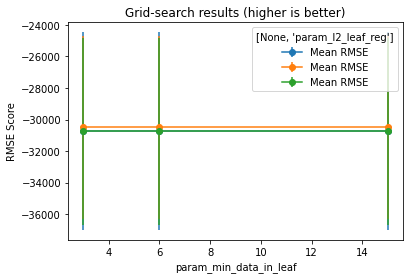

In [111]:
plot_results(index='min_data_in_leaf', columns='l2_leaf_reg')

In [96]:
%%time
model_cb = cb.CatBoostRegressor(random_seed=seed,verbose=400
                               ,learning_rate=0.03,iterations=3000
                               ,)

param = {
#     'learning_rate':[0.01,0.03],
#     "iterations":np.arange(1800,3800,400),
#     "grow_policy": ["Lossguide"],
    "min_data_in_leaf":[3,6,15],
# #     "bootstrap_type" : ["Bayesian"],
# #     "subsample":[0.66],
# #     'bagging_temperature':[0.02,0.05],
# #     'random_strength':[0.1,0.2,0.5,],
# #     "score_function":["Cosine","L2"],
    'l2_leaf_reg': [4,6,10,14],
# #     "sampling_unit": ["Object","Group"],
# #     "score_function":["Cosine","L2"],
#     'leaf_estimation_iterations': [1,5]
#     "custom_loss":["AUC"],
# #     "od_wait": [4,8,10],
}

# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
scoring_param = {'R2': 'r2', "RMSE":"neg_root_mean_squared_error"}

# gscv = GridSearchCV(model_1,param,scoring=scoring,cv=3,refit='AUC',verbose=100) #randomized search
# gscv = RandomizedSearchCV(model_cb, param_distributions=param
#                           ,scoring=scoring_param,cv=10,refit='RMSE',verbose=100,random_state=seed,n_iter=10) #randomized search

gscv = GridSearchCV(model_cb, param_grid=param
                          ,scoring=scoring_param,cv=5,refit='RMSE',verbose=400) #randomized search
# # fitmodel for gridsearch
gscv_4 = gscv.fit(X_train,y_train,eval_set=(X_cv, y_cv),early_stopping_rounds=100)
gscv_4_df = pd.DataFrame(gscv.cv_results_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START l2_leaf_reg=4, min_data_in_leaf=3..........................
0:	learn: 80420.0008484	test: 73302.8002591	best: 73302.8002591 (0)	total: 2.87ms	remaining: 8.61s
400:	learn: 16538.5302049	test: 25183.6424135	best: 25183.6424135 (400)	total: 1.44s	remaining: 9.34s
800:	learn: 10230.8435307	test: 23954.3902343	best: 23954.2377174 (794)	total: 2.69s	remaining: 7.39s
1200:	learn: 7302.6242115	test: 23446.5321668	best: 23446.5321668 (1200)	total: 3.94s	remaining: 5.9s
1600:	learn: 5362.2042946	test: 23271.0699144	best: 23270.7144527 (1580)	total: 5.46s	remaining: 4.78s
2000:	learn: 4122.6563997	test: 23176.2910263	best: 23175.8700461 (1995)	total: 6.97s	remaining: 3.48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 23174.0721
bestIteration = 2039

Shrink model to first 2040 iterations.
[CV 1/5; 1/12] END l2_leaf_reg=4, min_data_in_leaf=3; R2: (test=0.895) RMSE: (test=-20574.566) total time=  

In [97]:
gscv_4_relevant = gscv_4_df[["rank_test_RMSE",'param_l2_leaf_reg', 'param_min_data_in_leaf',"params","mean_test_R2","mean_test_RMSE","std_test_R2","std_test_RMSE",]]
gscv_4_relevant.sort_values(by="rank_test_RMSE", ascending = True)

,rank_test_RMSE,param_l2_leaf_reg,param_min_data_in_leaf,params,mean_test_R2,mean_test_RMSE,std_test_R2,std_test_RMSE
6,1,10,3,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 3}",0.847036,-30490.019630,0.034085,5785.230435
7,1,10,6,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 6}",0.847036,-30490.019630,0.034085,5785.230435
8,1,10,15,"{'l2_leaf_reg': 10, 'min_data_in_leaf': 15}",0.847036,-30490.019630,0.034085,5785.230435
3,4,6,3,"{'l2_leaf_reg': 6, 'min_data_in_leaf': 3}",0.846744,-30542.875344,0.034674,5966.538021
4,4,6,6,"{'l2_leaf_reg': 6, 'min_data_in_leaf': 6}",0.846744,-30542.875344,0.034674,5966.538021
5,4,6,15,"{'l2_leaf_reg': 6, 'min_data_in_leaf': 15}",0.846744,-30542.875344,0.034674,5966.538021
0,7,4,3,"{'l2_leaf_reg': 4, 'min_data_in_leaf': 3}",0.845459,-30661.712696,0.037089,6154.523038
1,7,4,6,"{'l2_leaf_reg': 4, 'min_data_in_leaf': 6}",0.845459,-30661.712696,0.037089,6154.523038
2,7,4,15,"{'l2_leaf_reg': 4, 'min_data_in_leaf': 15}",0.845459,-30661.712696,0.037089,6154.523038
9,10,14,3,"{'l2_leaf_reg': 14, 'min_data_in_leaf': 3}",0.841834,-31015.760234,0.033943,5765.129329


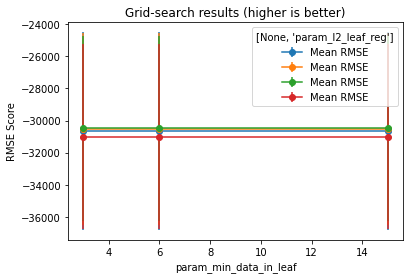

In [98]:
plot_results(index='min_data_in_leaf', columns='l2_leaf_reg')

In [99]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [17]:
%%time
model_cb = cb.CatBoostRegressor(random_seed=seed,verbose=400
                               ,learning_rate=0.03,iterations=3400
                               ,l2_leaf_reg=10,min_data_in_leaf = 3,loss_function='RMSE'
                               )


# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
scoring_param = {'R2': 'r2', "RMSE":"neg_root_mean_squared_error"}

# model_1 = model_cb.fit(X_training,y_training,eval_set=(X_cv, y_cv),early_stopping_rounds=50)
model_2 = model_cb.fit(X_training,y_training)

y_predict = model_cb.predict(X_testing)

r2_score = r2_score(y_testing, y_predict)
rmse_score = math.sqrt(mean_squared_error(y_testing, y_predict))

print("\nR^2 score: {}".format(r2_score))
print("RSME Score: {}".format(rmse_score))

0:	learn: 76828.2094262	total: 49.2ms	remaining: 2m 47s
400:	learn: 20945.4492236	total: 816ms	remaining: 6.1s
800:	learn: 16020.8214360	total: 1.58s	remaining: 5.13s
1200:	learn: 12549.8208481	total: 2.34s	remaining: 4.29s
1600:	learn: 10492.8668057	total: 3.11s	remaining: 3.49s
2000:	learn: 9008.4150336	total: 3.88s	remaining: 2.71s
2400:	learn: 7788.0204676	total: 4.65s	remaining: 1.93s
2800:	learn: 6811.5946707	total: 5.41s	remaining: 1.16s
3200:	learn: 5995.5482938	total: 6.19s	remaining: 385ms
3399:	learn: 5622.5722801	total: 6.58s	remaining: 0us

R^2 score: 0.887950457219211
RSME Score: 28268.905080991226
CPU times: user 40.2 s, sys: 7.09 s, total: 47.3 s
Wall time: 6.8 s


In [19]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    feature_dict={'feature_names':feature_names,'feature_importance':feature_importance}
    feature_df = pd.DataFrame(feature_dict)

    #Sort the DataFrame in order decreasing feature importance
    feature_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df=feature_df[0:10]
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],palette="crest")
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

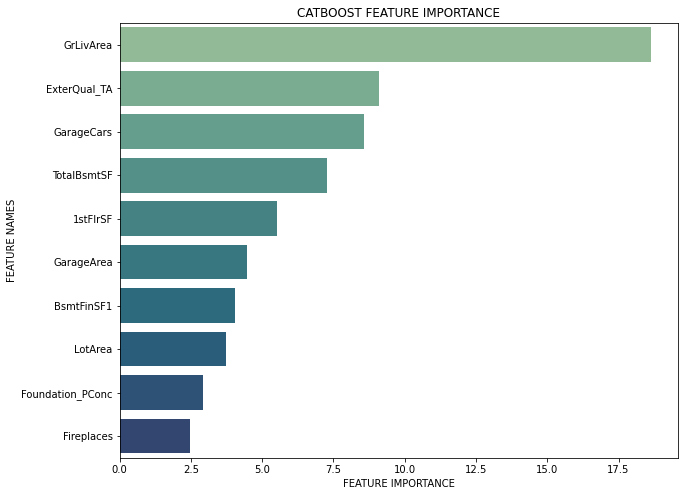

In [20]:
plot_feature_importance(model_cb.get_feature_importance(),X.columns,'CATBOOST')


In [21]:
%%time
#aggregate smote training data into a format compatible with function
catboost_data = Pool(X_training, y_training)

cb_feat_Interaction = model_cb.get_feature_importance(data=catboost_data,prettified=True
                                 ,type ="Interaction",verbose=10)
cb_feat_Interaction

Dataset is provided, but not used, because importance values are cached in the model.
CPU times: user 53.1 ms, sys: 11.4 ms, total: 64.5 ms
Wall time: 59.9 ms


,First Feature Index,Second Feature Index,Interaction
0,3,10,1.458951e+00
1,6,10,7.371117e-01
2,1,10,6.344589e-01
3,10,20,5.546157e-01
4,1,7,5.545688e-01
...,...,...,...
8864,9,34,1.318505e-06
8865,34,301,1.205431e-06
8866,8,334,1.165487e-06
8867,68,261,8.644251e-07


In [24]:
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=350)

In [34]:
top_interaction_var = list(cb_feat_Interaction[0:30]["First Feature Index"])
cb_feat_Interaction.iloc[2,1]
feat_2_idx = cb_feat_Interaction.iloc[2,1]
X.columns[feat_2_idx]

'GrLivArea'

In [49]:
top_interaction_var = list(cb_feat_Interaction[0:30]["First Feature Index"])

for rank,var_idx in enumerate(top_interaction_var):
#     print(rank,ele)
#     print("Rank:{}, Variablex 1: {}".format(rank,X.columns[int(var_idx)]))
    feat_2_idx = cb_feat_Interaction.iloc[rank,1]
    feat_interaction = round(cb_feat_Interaction.iloc[rank,2],2)
    print("Rank:{}, Interaction_str: {} Var1: {}, Variablex 2: {}".format(rank,feat_interaction,X.columns[int(var_idx)],X.columns[feat_2_idx]))
#     print("Rank:{}, Variablex 1: {}, Variablex 2: {}".format(rank,X.columns[int(var_idx)]),X.columns[feat_2_idx])


Rank:0, Interaction_str: 1.46 Var1: BsmtFinSF1, Variablex 2: GrLivArea
Rank:1, Interaction_str: 0.74 Var1: TotalBsmtSF, Variablex 2: GrLivArea
Rank:2, Interaction_str: 0.63 Var1: LotArea, Variablex 2: GrLivArea
Rank:3, Interaction_str: 0.55 Var1: GrLivArea, Variablex 2: GarageArea
Rank:4, Interaction_str: 0.55 Var1: LotArea, Variablex 2: 1stFlrSF
Rank:5, Interaction_str: 0.44 Var1: 1stFlrSF, Variablex 2: GrLivArea
Rank:6, Interaction_str: 0.44 Var1: LotArea, Variablex 2: TotalBsmtSF
Rank:7, Interaction_str: 0.43 Var1: LotFrontage, Variablex 2: GrLivArea
Rank:8, Interaction_str: 0.42 Var1: GrLivArea, Variablex 2: RoofMatl_WdShngl
Rank:9, Interaction_str: 0.4 Var1: LotFrontage, Variablex 2: GarageArea
Rank:10, Interaction_str: 0.37 Var1: LotFrontage, Variablex 2: TotalBsmtSF
Rank:11, Interaction_str: 0.35 Var1: LotArea, Variablex 2: MasVnrArea
Rank:12, Interaction_str: 0.33 Var1: GrLivArea, Variablex 2: GarageCars
Rank:13, Interaction_str: 0.33 Var1: LotArea, Variablex 2: GarageArea
Rank

In [50]:
%%time
#aggregate smote training data into a format compatible with function
catboost_data = Pool(X_training, y_training)

cb_feat_Predition = model_cb.get_feature_importance(data=catboost_data,prettified=True
                                 ,type ="PredictionValuesChange",verbose=10)
cb_feat_Predition

Used dataset leave statistics for fstr calculation
CPU times: user 50.9 ms, sys: 0 ns, total: 50.9 ms
Wall time: 45.9 ms


,Feature Id,Importances
0,10,18.643379
1,145,9.080825
2,19,8.555180
3,6,7.272463
4,7,5.532043
...,...,...
345,288,0.000000
346,317,0.000000
347,321,0.000000
348,326,0.000000


In [46]:
top_pred_var = list(cb_feat_Predition[0:30]["Feature Id"])

for rank,var_idx in enumerate(top_pred_var):
#     print(rank,ele)
    feat_pred_value = round(cb_feat_Predition.iloc[rank,1],2)
    print("Rank:{}, Prediction Value: {}, Variablex: {}".format(rank,feat_pred_value,X.columns[int(var_idx)]))

Rank:0, Prediction Value: 18.64, Variablex: GrLivArea
Rank:1, Prediction Value: 9.08, Variablex: ExterQual_TA
Rank:2, Prediction Value: 8.56, Variablex: GarageCars
Rank:3, Prediction Value: 7.27, Variablex: TotalBsmtSF
Rank:4, Prediction Value: 5.53, Variablex: 1stFlrSF
Rank:5, Prediction Value: 4.45, Variablex: GarageArea
Rank:6, Prediction Value: 4.03, Variablex: BsmtFinSF1
Rank:7, Prediction Value: 3.74, Variablex: LotArea
Rank:8, Prediction Value: 2.93, Variablex: Foundation_PConc
Rank:9, Prediction Value: 2.46, Variablex: Fireplaces
Rank:10, Prediction Value: 2.36, Variablex: KitchenQual_TA
Rank:11, Prediction Value: 1.79, Variablex: BsmtQual_Gd
Rank:12, Prediction Value: 1.79, Variablex: FullBath
Rank:13, Prediction Value: 1.31, Variablex: OpenPorchSF
Rank:14, Prediction Value: 1.21, Variablex: FireplaceQu_NA
Rank:15, Prediction Value: 1.17, Variablex: BsmtFinType1_GLQ
Rank:16, Prediction Value: 1.11, Variablex: LotFrontage
Rank:17, Prediction Value: 1.11, Variablex: KitchenQual_